(4, 1295, 1364)
(3, 1295, 1364)
[[205 203 198 ... 230 216 148]
 [206 206 199 ... 239 223 140]
 [204 201 197 ... 335 246 143]
 ...
 [192 197 197 ... 120 106 112]
 [189 194 198 ... 116 110 120]
 [186 189 193 ... 113 117 122]]
3102
Colorband = NIR


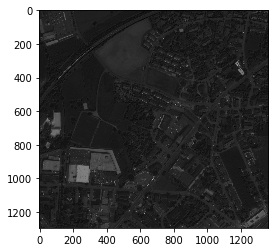

Colorband = Red


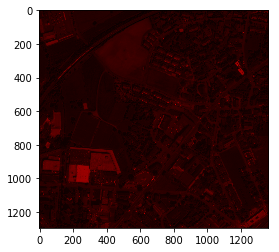

Colorband = Green


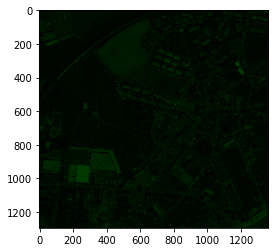

Colorband = Blue


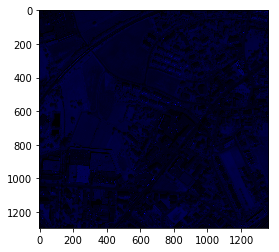

In [204]:
import tensorflow as tf
from osgeo import gdal
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as clr


def plot_NIR_RGB(n):
#     image = Image.open("Tensorflow tests/Zurich_dataset_v1.0/images_tif/zh{}.tif".format(n))
    
    src_ds = gdal.Open("Tensorflow tests/Zurich_dataset_v1.0/images_tif/zh{}.tif".format(n))
    data = src_ds.ReadAsArray()
    print(data.shape)
    print(data[1:, :, :].shape)
    colors = ['NIR', 'Red', 'Green', 'Blue']
    cmap = ['White', 'Red', 'Green', 'Blue']
    
#     print(data)

    
    print(data[0])
    
    listed_values = []
    for i in range(len(data)):
        for j in data[i]:
            listed_values.append(max(j))
    print(max(listed_values))
    
    img1 = data[1]
    img2 = data[2]
    img3 = data[3]
        
    img = np.dstack((img1/8192,img2/8192,img3/8192))
    
#     rgb = data[1:, :, :].reshape((data.shape[1], data.shape[2],3))
#     rgb = rgb.point(lambda i: i * 16, "L") 
    
#     print(rgb)
#     plt.imshow(rgb)
#     plt.show()

    
    for i in range(4):
        print('Colorband = {}'.format(colors[i]))
        cm = clr.LinearSegmentedColormap.from_list(colors[i], ['black',cmap[i]], N=256)
        img = plt.imshow(data[i], cmap = cm)
        plt.show()


# fill in a value between 1 and 20
plot_NIR_RGB(1)

(600, 512, 3)


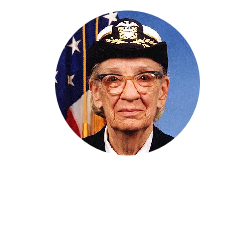

In [169]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook


with cbook.get_sample_data('grace_hopper.png') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((260, 200), radius=200, transform=ax.transData)
im.set_clip_path(patch)

print(image.shape)
ax.axis('off')
plt.show()